In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


# Find relation between featurs and Loan Status

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data = pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# We don't need Lean_ID, so drop it
data = data.drop('Loan_ID', axis=1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 12)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
# missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Function to create a dataframe with number and percentage of missing data in the dataframe

def missing_to_df(data):
    total_missing_data = data.isnull().sum().sort_values(ascending=False)
    percentage_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total_missing_data, percentage_missing_data], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [ ]:
missing_data = missing_to_df(data)
missing_data[missing_data['Total']>0]

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


In [ ]:
# creating dataframe for categorical variables
cat_cols = data.dtypes=='object'
cat_cols= list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
# Creatinf dataframe for all numerical featurs
num_cols = data.dtypes!='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# Loan_Status is target, so remove from the features
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

# Univariate Analysis

In [ ]:
target = 'Loan_Status'

In [ ]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

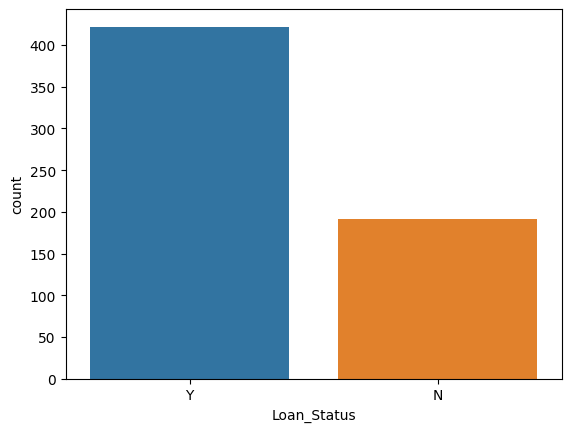

In [ ]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

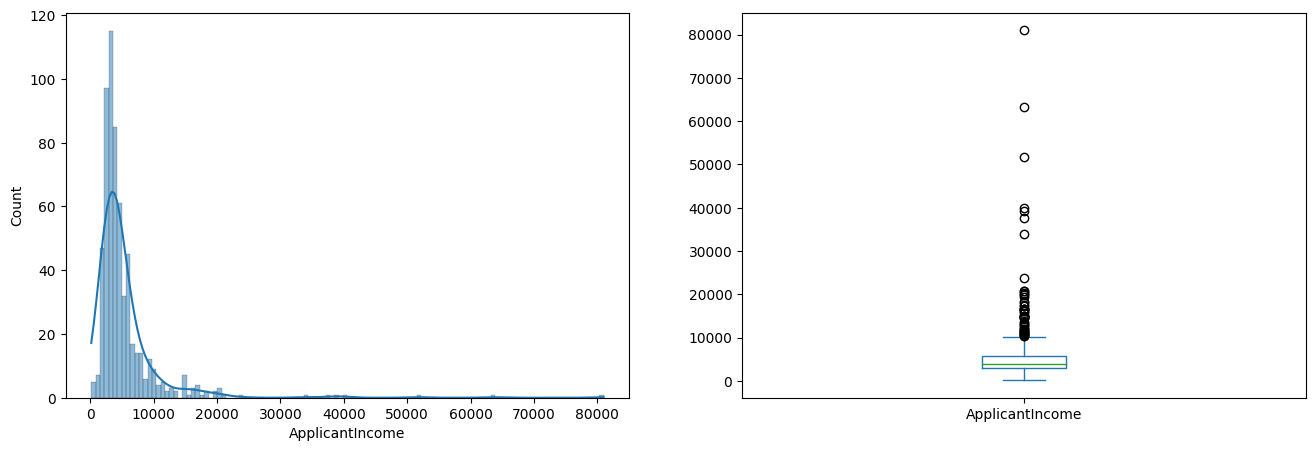

In [ ]:
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], kde=True)

plt.subplot(122)
#sns.boxplot(data['ApplicantIncome'])
data.ApplicantIncome.plot.box(figsize=(16,5))
plt.show()

In [ ]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

/tmp/ipykernel_34/2136516450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Loan_Status").mean()['ApplicantIncome']


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

is this difference between mean statistically significant. To know do z-test

In [ ]:
data.groupby("Loan_Status").std()['ApplicantIncome']

/tmp/ipykernel_34/1235756493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Loan_Status").std()['ApplicantIncome']


Loan_Status
N    6819.558528
Y    5765.441615
Name: ApplicantIncome, dtype: float64

In [ ]:
Applicant_income_Y = data[data['Loan_Status']=='Y']['ApplicantIncome']
Applicant_income_Y.head()

0    5849
2    3000
3    2583
4    6000
5    5417
Name: ApplicantIncome, dtype: int64

In [ ]:
Applicant_income_N = data[data['Loan_Status']=='N']['ApplicantIncome']
Applicant_income_N.head()

1      4583
7      3036
9     12841
13     1853
17     3510
Name: ApplicantIncome, dtype: int64

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

## T-test

In [ ]:
# H0:  means are same
# Ha: mean are statistically different
alpha = 0.05  # significance level

t_stat, p_value = ttest_ind(Applicant_income_Y, Applicant_income_N)

In [ ]:
# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

print("T-statistic:", t_stat)
print("P-value:", p_value)

Fail to reject the null hypothesis: The means are not significantly different.
T-statistic: -0.11650844828724542
P-value: 0.907287812130518


## Z-Test

In [ ]:
ztest_Score, p_value= ztest(Applicant_income_N, Applicant_income_Y,alternative="two-sided")


In [ ]:
# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

print("ztest_Score:", ztest_Score)
print("P-value:", p_value)

Fail to reject the null hypothesis: The means are not significantly different.
ztest_Score: 0.11650844828724542
P-value: 0.9072495909325038


##  Bin Income(Numerical to categorical): Dividing ApplicantIncome in different Groups

In [ ]:
bins=[0,2500,4000,6000,8000,10000,20000,40000,81000]
group=['Low','Average','medium','H1','H2','H3','H4','Very High']

In [ ]:
data['Income_Bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [ ]:
pd.crosstab(data['Income_Bin'],data["Loan_Status"])

Loan_Status,N,Y
Income_Bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,1,2


To check whether income bin and loan status are different, we use chisquare test(cat vs cat)

In [ ]:
from scipy.stats import chi2_contingency
val=pd.crosstab(index=data['Income_Bin'],columns=data["Loan_Status"]).values
print(val)
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


(1.2420001711303135,
 0.9899274842922701,
 7,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 12.50814332,  27.49185668],
        [  2.81433225,   6.18566775],
        [  0.93811075,   2.06188925]]))

p_value is hign. So the Application Status not depend on Income Bin(the way we bin it)

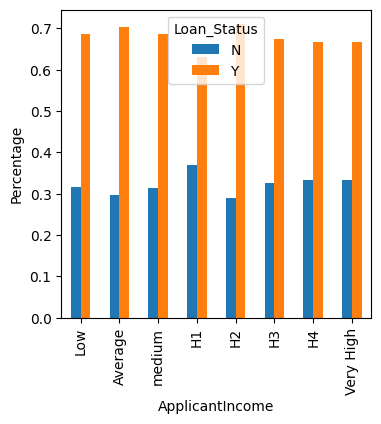

In [ ]:
Income_Bin = pd.crosstab(data['Income_Bin'],data["Loan_Status"], normalize='index') 
Income_Bin.plot(kind='bar',figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

We can see Loan Status not depend Applicant Income. We have to check other features. 

In [ ]:
# Creating a new featurre call Total_Income
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [ ]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data['TotalIncome_bin'] = pd.cut(data['TotalIncome'], bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0,High


In [ ]:
vals = pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


<AxesSubplot: xlabel='TotalIncome_bin'>

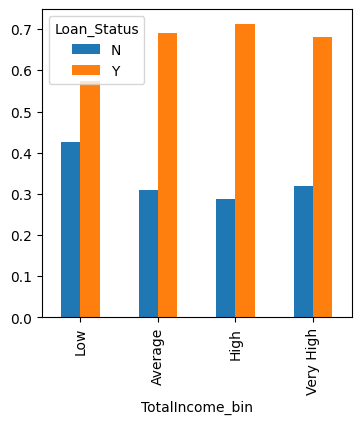

In [ ]:
vals_n = pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'], normalize='index')
vals_n.plot(kind='bar',figsize=(4,4))


In [ ]:
chi2_contingency(vals) # chi_stat, p_value, dof, expected_freq

(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

p_value > 0.05, so difference is not statistically significant. So stick to H0: No difference

In [ ]:
#Loan month
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Converting month to years
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [ ]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

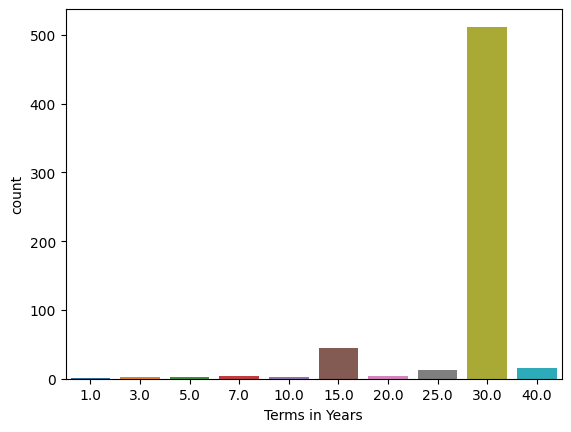

In [ ]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Terms in Years")
plt.show()

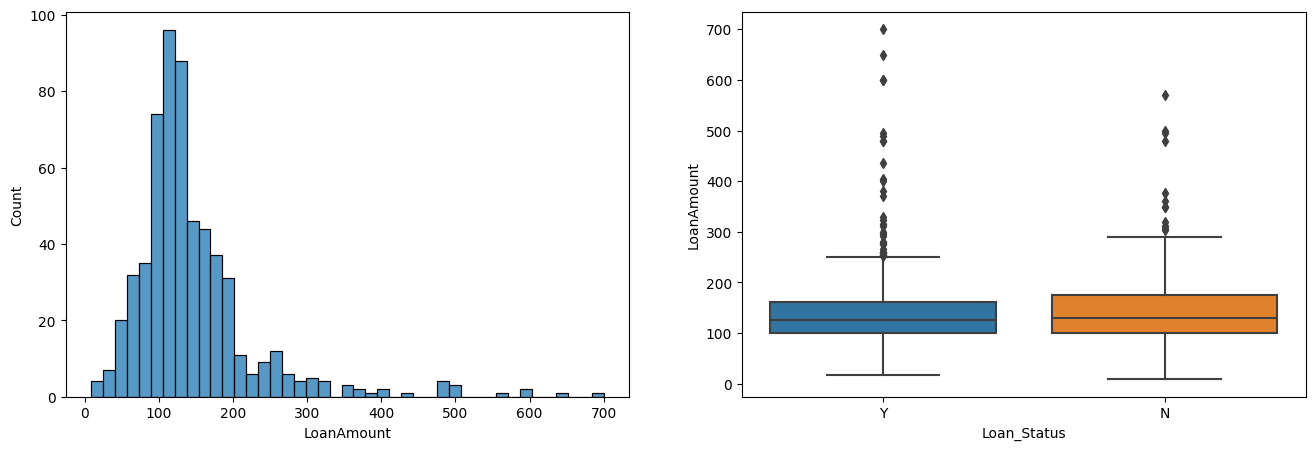

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y='LoanAmount')

plt.show()

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'TotalIncome', 'TotalIncome_bin'],
      dtype='object')

## Ability to pay EMI

In [ ]:
data['Loan_Amount_Per_Year'] = data['LoanAmount']/data['Loan_Amount_Term']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome,TotalIncome_bin,Loan_Amount_Per_Year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000


In [ ]:
data['EMI'] = data['Loan_Amount_Per_Year']*1000/12
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome,TotalIncome_bin,Loan_Amount_Per_Year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667


In [ ]:
data['Able_To_Pay_EMI'] = (data['TotalIncome']*0.1 > data['EMI']).astype('int')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome,TotalIncome_bin,Loan_Amount_Per_Year,EMI,Able_To_Pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1


<AxesSubplot: xlabel='Able_To_Pay_EMI', ylabel='count'>

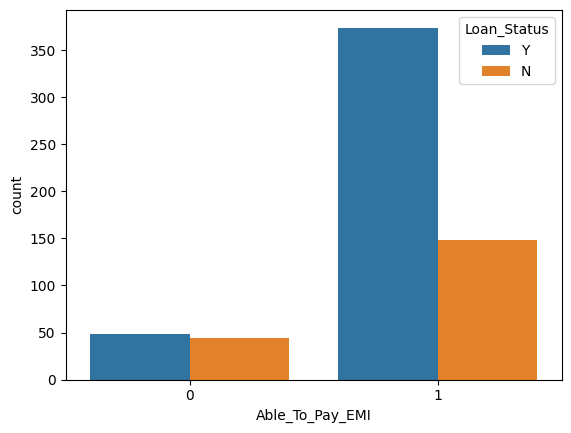

In [ ]:
sns.countplot(x='Able_To_Pay_EMI', data=data, hue='Loan_Status')

We can see people with ability to pay EMI has higher probability to get Loan.

Checking with chisquare test that , this difference is statistically significant or not.

In [ ]:
vals = pd.crosstab(data['Able_To_Pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_To_Pay_EMI,,
0,44,48
1,148,374


In [ ]:
chi2_contingency(pd.crosstab(data['Able_To_Pay_EMI'], data['Loan_Status']))

(12.909621328812786,
 0.0003268974206671644,
 1,
 array([[ 28.76872964,  63.23127036],
        [163.23127036, 358.76872964]]))

p_value = 0.0003268974206671644 is small.
So difference is statistically significant

## Dependents

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data['Dependents'].replace('3+',3,inplace=True)

In [ ]:
data['Dependents'] = data['Dependents'].astype('float')

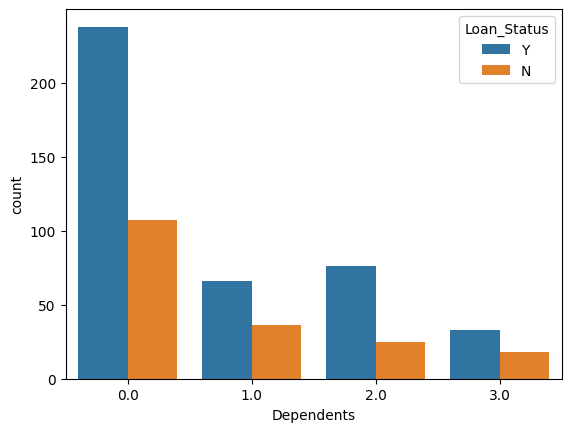

In [ ]:
sns.countplot(data=data, x= 'Dependents', hue='Loan_Status')
plt.show()

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

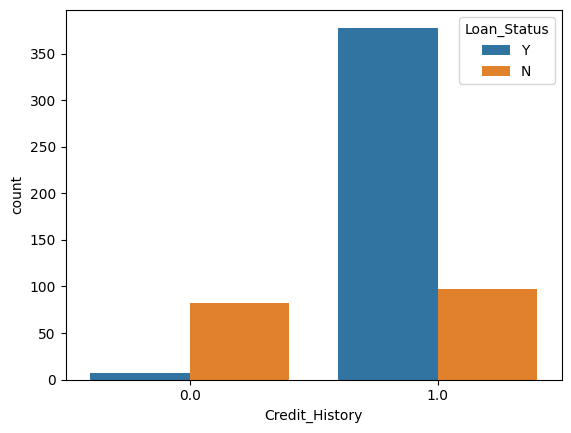

In [ ]:
sns.countplot(data=data, x='Credit_History', hue='Loan_Status')

In [ ]:
pd.crosstab(data['Credit_History'],data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
chi2_contingency(pd.crosstab(data['Credit_History'],data['Loan_Status']))

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

p_value = 7.184759548750746e. very low. So these two column are highly related


# Missing Values

In [ ]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Income_Bin               0
TotalIncome              0
TotalIncome_bin          0
Loan_Amount_Per_Year    36
EMI                     36
Able_To_Pay_EMI          0
dtype: int64

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(2)

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [ ]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')

In [ ]:
# Imputation
from sklearn.impute import SimpleImputer

In [ ]:
vals = pd.DataFrame([10,20,10,15,17,18,21,np.nan])

In [ ]:
si = SimpleImputer(strategy='mean')

In [ ]:
#object.method
si.fit_transform(vals)

In [ ]:
num_missing = ['EMI','Loan_Amount_Per_Year', 'LoanAmount','Loan_Amount_Term']

median_imputer = SimpleImputer(strategy='median')
for col in num_missing:
    data[col]= pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isna().sum()

In [ ]:
# Highest Freq imputation for some categorical columns.
cat_missing = ['Gender','Married','Dependents']
freq_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

# Categorical to Numerical

In [ ]:
# categorical feature types: 1. Nominal 2. Ordinal
s = (data.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Label Encoder

Ordinal encoding should be used for ordinal variables (where order matters, like cold , warm , hot ); vs Label encoding should be used for non-ordinal (aka nominal) variables (where order doesn't matter,Male, Female )

In [ ]:
# Loan_Status
col='Loan_Status'
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder # Used when we have two values
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
col = 'Gender'
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [ ]:
col='Married'
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

1    401
0    213
Name: Married, dtype: int64

**If feature column have more than two categories, use TargetEncoder******

## TargetEncoding
Target encoding is a technique used in machine learning and data analysis to encode categorical variables based on the relationship between the category and the target variable. It is particularly useful when dealing with classification problems where the target variable is categorical.

In target encoding, each category of a categorical variable is replaced with a value derived from the target variable's statistics (e.g., mean, median, or probability) for that category. The goal is to capture the relationship or correlation between the categorical variable and the target variable.

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
te = TargetEncoder()                     #(categorical_column, target_colummn)
data['Property_Area'] = te.fit_transform(data['Property_Area'], data['Loan_Status'])

In [ ]:
data['Property_Area'].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

Probability : P[ Loan_Status=Yes | Semiurban ] = 0.768240

In [ ]:
print(pd.crosstab(data['Property_Area'], data['Loan_Status']))
print("-------------------------------------------------------------------------")
print(pd.crosstab(data['Property_Area'], data['Loan_Status'], normalize='index'))

Loan_Status     0    1
Property_Area         
0.614525       69  110
0.658416       69  133
0.768240       54  179
-------------------------------------------------------------------------
Loan_Status           0         1
Property_Area                    
0.614525       0.385475  0.614525
0.658416       0.341584  0.658416
0.768240       0.231760  0.768240


In [ ]:
col='Education'
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [ ]:
data['Self_Employed'].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [ ]:
te = TargetEncoder()                     #(categorical_column, target_colummn)
data['Self_Employed'] = te.fit_transform(data['Self_Employed'], data['Loan_Status'])
data['Self_Employed'].value_counts()

0.686000    500
0.682936     82
0.711469     32
Name: Self_Employed, dtype: int64

In [ ]:
data.dtypes

Gender                     int64
Married                    int64
Dependents               float64
Education                  int64
Self_Employed            float64
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area            float64
Loan_Status                int64
Income_Bin              category
TotalIncome              float64
TotalIncome_bin         category
Loan_Amount_Per_Year     float64
EMI                      float64
Able_To_Pay_EMI            int64
dtype: object

# Correlation Coefficients

/tmp/ipykernel_34/4230487732.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), square=True, annot=True)


<AxesSubplot: >

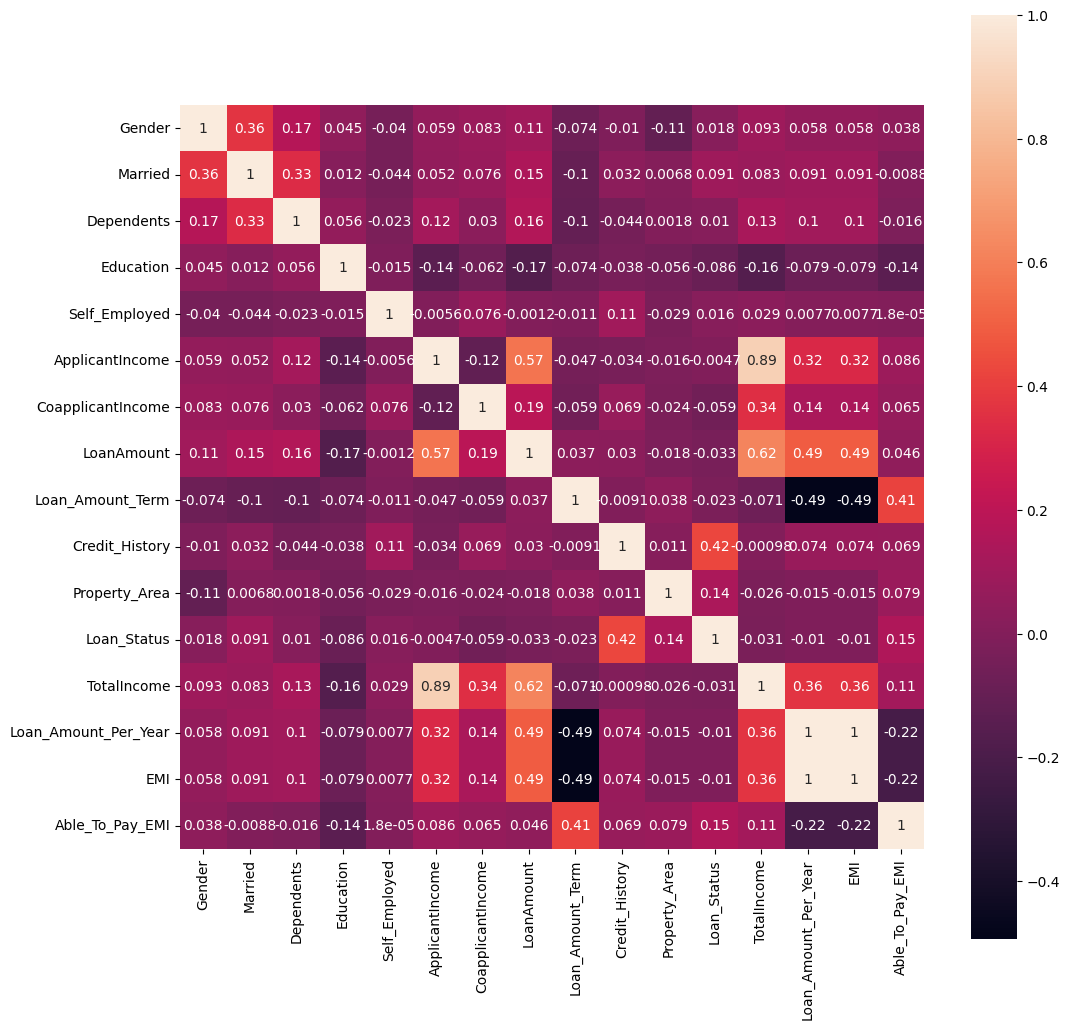

In [ ]:
 #PCC
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(method='pearson'), square=True, annot=True)

-1 and 1 are good. Near to 0 are bed.

Most Important feature when usong pearson corr coff
1. Credit_History
2. Able_To_Pay_EMI
3. Property_Area

Least usefull Featur
1. ApplicantIncome = -0.0047 

/tmp/ipykernel_34/2192155092.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), square=True, annot=True)


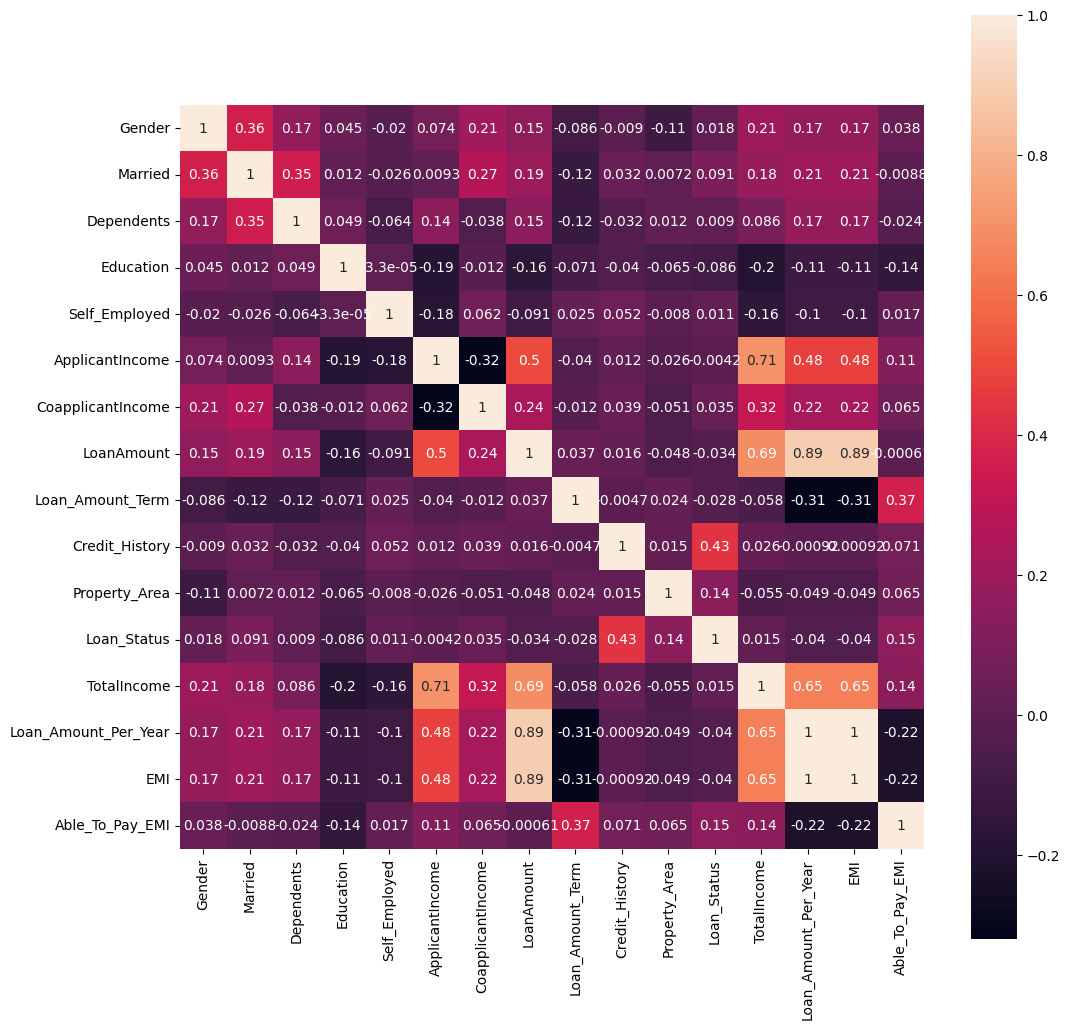

In [ ]:
 #PCC
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(method='spearman'), square=True, annot=True)
plt.show()

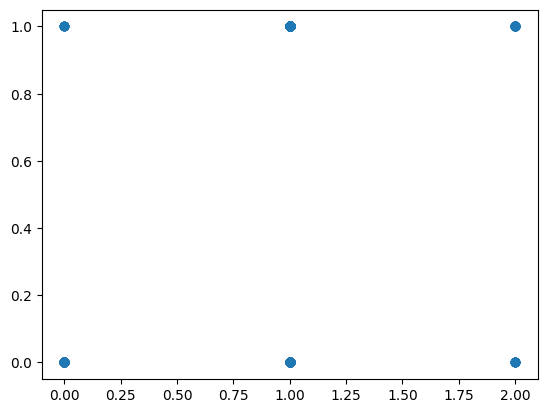

In [ ]:
# Interview Question
plt.scatter(data['Credit_History'], data['Loan_Status'])
plt.show()
# Somwtimes scatter plots can be missleading do to categorical nature of the data

SRCC = 0.45 but no relation in plot. Because we have only 6 unique values(2 for Loan_Status and 4 for Credit_History) for data. All the data poitns are opverlapping with each other on this 6 points.

In this case countplot will worl better

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

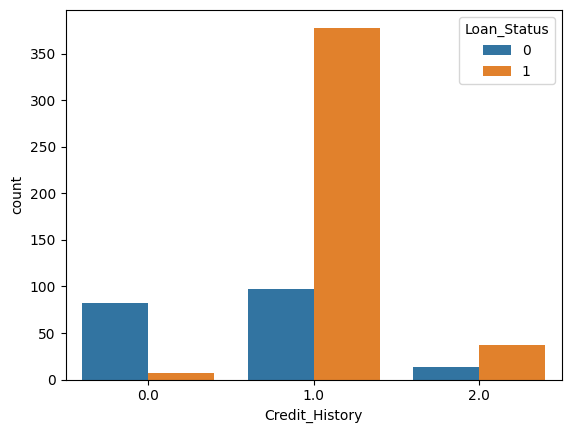

In [ ]:
sns.countplot(data=data, x='Credit_History', hue='Loan_Status')

Observation: 
* If credithistory is 0, probability of getting loan is very low.
* If credithistory is 1, probability of getting loan is very good.



--------------
# Standardization / StandardScaler : Mean Centring and Std Dev Scaling

StandardScaler is a data preprocessing technique used to standardize numerical data by subtracting the mean and dividing by the standard deviation. It transforms the features of a dataset to have zero mean and unit(1)variance. This scaling ensures that the features are on a similar scale, which can be beneficial for certain machine learning algorithms.

X_scaled = (X - X_mean) / X_std

Why use: aids in Optimization Problems(ML)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,TotalIncome,TotalIncome_bin,Loan_Amount_Per_Year,EMI,Able_To_Pay_EMI
0,1,0,0.0,0,0.686000,5849,0.0,128.0,30.0,1.0,0.658416,1,medium,5849.0,High,4.383333,365.277778,0
1,1,1,1.0,0,0.686000,4583,1508.0,128.0,30.0,1.0,0.614525,0,medium,6091.0,High,4.266667,355.555556,1
2,1,1,0.0,0,0.682936,3000,0.0,66.0,30.0,1.0,0.658416,1,Average,3000.0,Low,2.200000,183.333333,1
3,1,1,0.0,1,0.686000,2583,2358.0,120.0,30.0,1.0,0.658416,1,Average,4941.0,Average,4.000000,333.333333,1
4,1,0,0.0,0,0.686000,6000,0.0,141.0,30.0,1.0,0.658416,1,medium,6000.0,High,4.700000,391.666667,1


In [ ]:
data.dtypes

Gender                     int64
Married                    int64
Dependents               float64
Education                  int64
Self_Employed            float64
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area            float64
Loan_Status                int64
Income_Bin              category
TotalIncome              float64
TotalIncome_bin         category
Loan_Amount_Per_Year     float64
EMI                      float64
Able_To_Pay_EMI            int64
dtype: object

In [ ]:
data.drop(['TotalIncome_bin', 'Income_Bin'], axis=1, inplace=True)

In [ ]:
data.dtypes

Gender                    int64
Married                   int64
Dependents              float64
Education                 int64
Self_Employed           float64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area           float64
Loan_Status               int64
TotalIncome             float64
Loan_Amount_Per_Year    float64
EMI                     float64
Able_To_Pay_EMI           int64
dtype: object

In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)
# the std_data is numpy array we we need dataframe so
std_data = pd.DataFrame(data=std_data, columns=data.columns)
std_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Per_Year,EMI,Able_To_Pay_EMI
0,0.472343,-1.372089,-0.737806,-0.528362,-0.156957,0.072991,-0.554487,-0.211241,0.273231,0.134703,-0.440191,0.674519,-0.182184,-0.212270,-0.212270,-2.381998
1,0.472343,0.728816,0.253470,-0.528362,-0.156957,-0.134412,-0.038732,-0.211241,0.273231,0.134703,-1.109162,-1.482537,-0.144684,-0.231329,-0.231329,0.419816
2,0.472343,0.728816,-0.737806,-0.528362,-0.680802,-0.393747,-0.554487,-0.948996,0.273231,0.134703,-0.440191,0.674519,-0.623656,-0.568956,-0.568956,0.419816
3,0.472343,0.728816,-0.737806,1.892641,-0.156957,-0.462062,0.251980,-0.306435,0.273231,0.134703,-0.440191,0.674519,-0.322885,-0.274894,-0.274894,0.419816
4,0.472343,-1.372089,-0.737806,-0.528362,-0.156957,0.097728,-0.554487,-0.056551,0.273231,0.134703,-0.440191,0.674519,-0.158785,-0.160537,-0.160537,0.419816


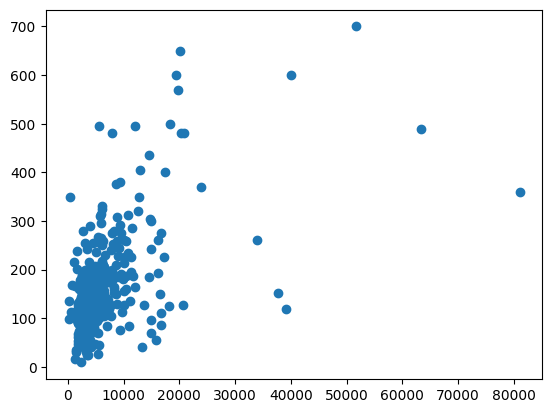

In [ ]:
plt.scatter(data['ApplicantIncome'], data['LoanAmount'])

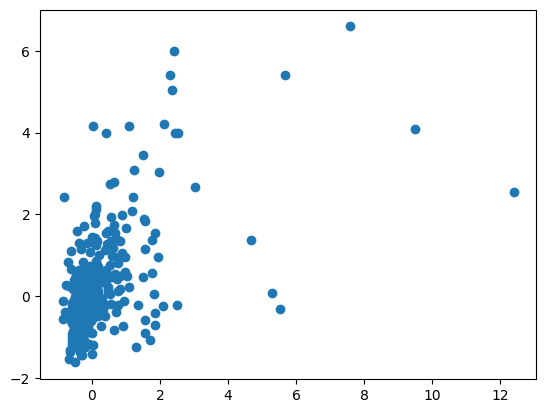

In [ ]:
plt.scatter(std_data['ApplicantIncome'], std_data['LoanAmount'])

Same scatter plot for data and std_data 

# MinMaxScaler

It scales the features of a dataset to a predefined interval, typically between 0 and 1. This scaling preserves the relative relationships between the data points.

X_scaled = (X - X_min) / (X_max - X_min)

The purpose of MinMaxScaler is to normalize the data, making it suitable for machine learning algorithms that assume all features are on the same scale. It helps to prevent features with larger values from dominating the learning process.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
mm_data = scaler.fit_transform(data)
mm_data = pd.DataFrame(mm_data, columns=data.columns)
mm_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Per_Year,EMI,Able_To_Pay_EMI
0,1.0,0.0,0.000000,0.0,0.107393,0.070489,0.000000,0.172214,0.743590,0.5,0.285533,1.0,0.055394,0.036886,0.036886,0.0
1,1.0,1.0,0.333333,0.0,0.107393,0.054830,0.036192,0.172214,0.743590,0.5,0.000000,0.0,0.058435,0.035833,0.035833,1.0
2,1.0,1.0,0.000000,0.0,0.000000,0.035250,0.000000,0.082489,0.743590,0.5,0.285533,1.0,0.019583,0.017164,0.017164,1.0
3,1.0,1.0,0.000000,1.0,0.107393,0.030093,0.056592,0.160637,0.743590,0.5,0.285533,1.0,0.043980,0.033424,0.033424,1.0
4,1.0,0.0,0.000000,0.0,0.107393,0.072356,0.000000,0.191027,0.743590,0.5,0.285533,1.0,0.057292,0.039747,0.039747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.107393,0.034014,0.000000,0.089725,0.743590,0.5,0.000000,1.0,0.018326,0.018669,0.018669,1.0
610,1.0,1.0,1.000000,0.0,0.107393,0.048930,0.000000,0.044863,0.358974,0.5,0.000000,1.0,0.033485,0.021379,0.021379,1.0
611,1.0,1.0,0.333333,0.0,0.107393,0.097984,0.005760,0.353111,0.743590,0.5,0.285533,1.0,0.086352,0.073472,0.073472,1.0
612,1.0,1.0,0.666667,0.0,0.107393,0.091936,0.000000,0.257598,0.743590,0.5,0.285533,1.0,0.077189,0.053598,0.053598,1.0


**choice between using MinMaxScaler or StandardScaler**

The choice between using MinMaxScaler or StandardScaler depends on the characteristics of your data and the requirements of your specific machine learning algorithm. Here are some considerations to help you decide:

Range of the data: If preserving the original range of the data is important, MinMaxScaler is a good choice. It scales the data to a specific range, typically between 0 and 1, but you can also customize the range. On the other hand, StandardScaler standardizes the data to have zero mean and unit variance, which can result in values that are both positive and negative.

Outliers: If your data contains outliers, StandardScaler can be more robust than MinMaxScaler. StandardScaler uses the mean and standard deviation, which are less sensitive to extreme values. MinMaxScaler, however, can be affected by outliers as it scales the data based on the minimum and maximum values.

Distribution of the data: StandardScaler assumes that the data follows a normal distribution. If your data is not normally distributed, it might be preferable to use MinMaxScaler to scale the data between a specific range.

Requirements of the machine learning algorithm: Some machine learning algorithms, such as K-nearest neighbors (KNN) or neural networks, often benefit from or require input features to be on a similar scale. In such cases, using StandardScaler to standardize the data can be beneficial. However, other algorithms, such as decision trees or random forests, are not sensitive to feature scaling and can work well with either scaler.